In [26]:
%load_ext autoreload
%autoreload 2
from board import *
from candy import *
from analysis import *
import matplotlib.pyplot as plt
from viz import Viz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading the data

In [27]:
df = pd.read_csv("generated/results_100000.csv")

/var/folders/n7/7ln3k6zx5hj40n1dc441clm40000gn/T/ipykernel_70129/189879131.py:1: DtypeWarning: Columns (69,72,75,78,81,84,87,90,93,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("generated/results_100000.csv")


In [28]:
df

,Explo,n_rollout,n_simulation,n_random,state,Move_1,Move_1_N,Move_1_Q,Move_2,Move_2_N,...,Move_28_Q,Move_29,Move_29_N,Move_29_Q,Move_30,Move_30_N,Move_30_Q,Move_31,Move_31_N,Move_31_Q
0,2000,2,3000,2,4060204050402040605030505010201030406030501030...,"((3, 3), (4, 3))",2885,1852.772270,"((2, 5), (2, 6))",22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,3000,2,5010502060303050105050105060304030103040306060...,"((1, 4), (1, 5))",2737,899.568871,"((4, 4), (4, 5))",55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,2,3000,2,6020404060402010104030302030504010302040302050...,"((3, 4), (3, 5))",330,281.890909,"((2, 0), (2, 1))",287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,2,3000,2,4060105050406060201030602030506040606040105040...,"((3, 4), (4, 4))",502,193.824701,"((2, 1), (2, 2))",465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,2,3000,2,6010304040305060404030205010506060201050204050...,"((1, 3), (1, 4))",677,237.955687,"((2, 0), (2, 1))",420.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2000,2,3000,2,1010304040203060304030605010402030406350403040...,"((0, 2), (1, 2))",1173,813.895993,"((3, 4), (3, 5))",393.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,2000,2,3000,2,1050502060404010605050301060305060205020401040...,"((2, 4), (3, 4))",2358,1269.733673,"((4, 2), (4, 3))",87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,2000,2,3000,2,1050206050406050103040604020404020604020402060...,"((1, 4), (1, 5))",364,288.615385,"((4, 4), (4, 5))",347.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,2000,2,3000,2,4030506030103050602050606050101060101030506030...,"((4, 4), (4, 5))",420,238.047619,"((4, 3), (5, 3))",337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizing

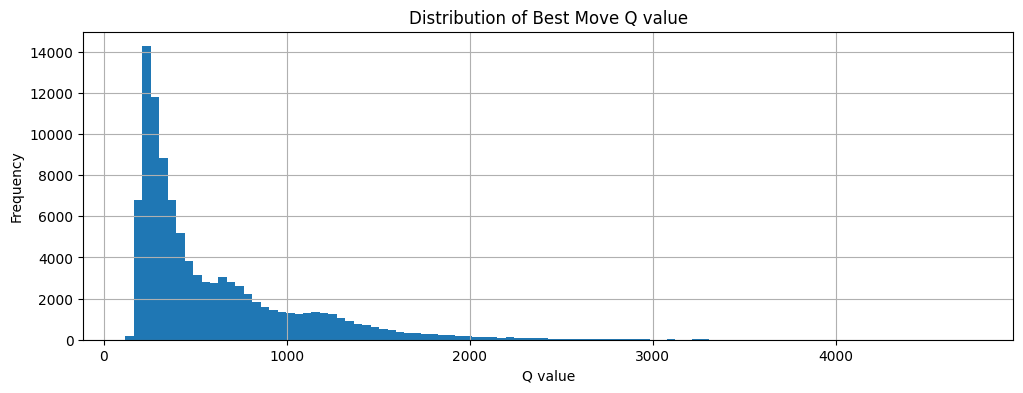

In [29]:
plt.figure(figsize=(12, 4))
df["Move_1_Q"].hist(bins= 100)
plt.title("Distribution of Best Move Q value")
plt.xlabel("Q value")
plt.ylabel("Frequency")
plt.show()

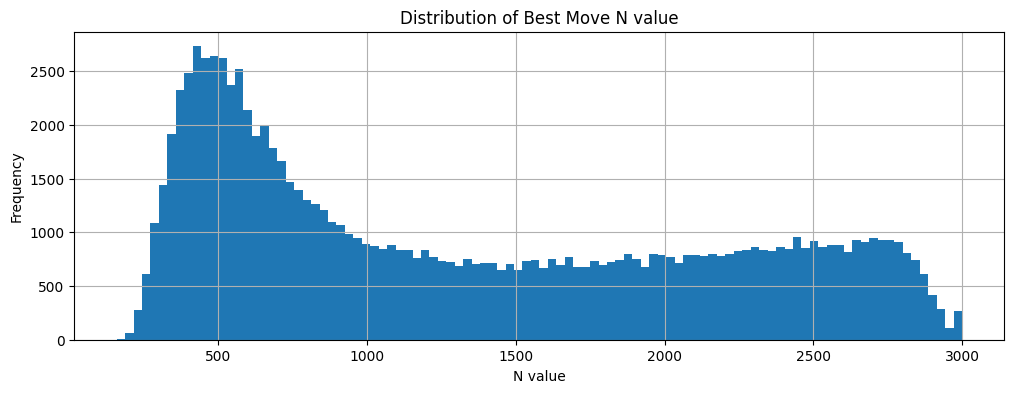

In [30]:
plt.figure(figsize=(12, 4))
df["Move_1_N"].hist(bins= 100)
plt.title("Distribution of Best Move N value")
plt.xlabel("N value")
plt.ylabel("Frequency")
plt.show()


/var/folders/n7/7ln3k6zx5hj40n1dc441clm40000gn/T/ipykernel_70129/4280016767.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


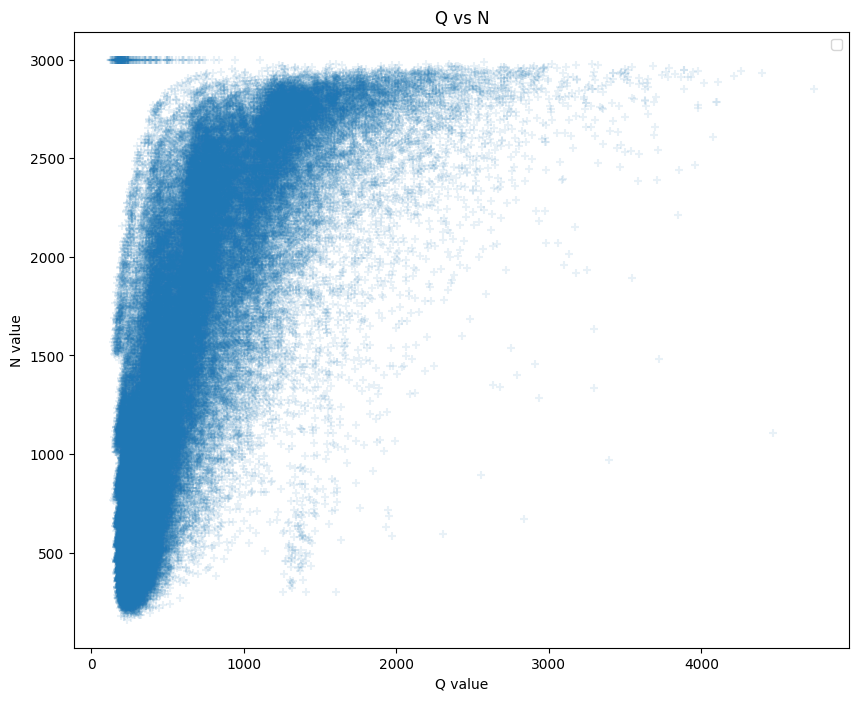

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the means
mean_q = np.mean(df["Move_1_Q"])
mean_n = np.mean(df["Move_1_N"])

plt.figure(figsize=(10,8))
plt.scatter(df["Move_1_Q"], df["Move_1_N"], alpha= 0.1, marker="+")
plt.title("Q vs N")
plt.xlabel("Q value")
plt.ylabel("N value")
plt.legend()
plt.show()

# How direct reward our mcts seeks ? 

In [11]:
# WARNING: This will take like 1mn to run

real_move_scores = []
count = 0
for state, move in zip(df["state"], df["Move_1"]):
    mean_score = []
    for i in (range(20)):
        score = 0
        board = state_to_board(state,7,7)
        a = Action(board)
        a.swap(*move[0], *move[1])
        board.update()
        mean_score.append(board.score)
    real_move_scores.append(np.mean(mean_score))
    count += 1
    if count % 100 == 0:
        print(count)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200


Text(0, 0.5, 'Real Move Score')

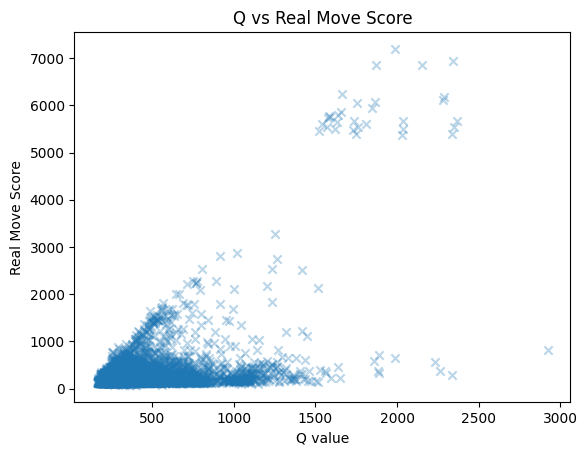

In [12]:
plt.scatter(df["Move_1_Q"], real_move_scores, alpha = 0.3, marker = "x")
plt.title("Q vs Real Move Score")
# log scale
plt.xlabel("Q value")
plt.ylabel("Real Move Score")


In [14]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 8.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


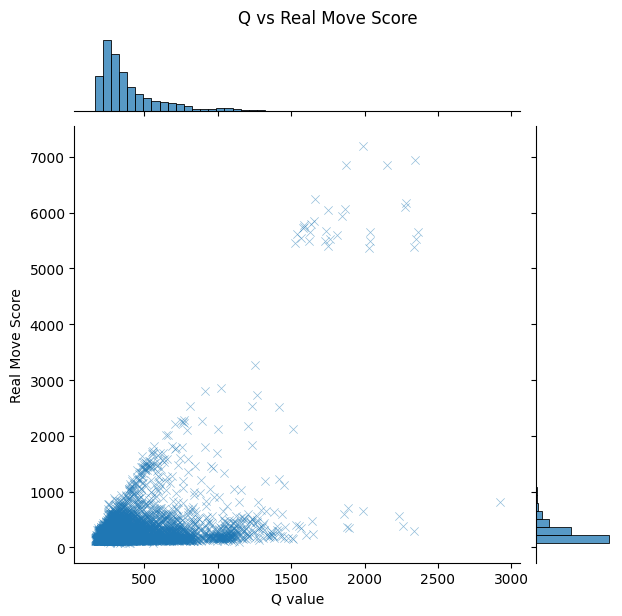

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with marginal histograms
sns.jointplot(x=df["Move_1_Q"], y=real_move_scores, kind="scatter", marginal_kws=dict(bins=50, fill=True), alpha=0.5, marker="x")

# Set the title and labels
plt.suptitle("Q vs Real Move Score", y=1.02)
plt.xlabel("Q value")
plt.ylabel("Real Move Score")

plt.show()

# Helper function to play a row of the dataframe on viz

In [3]:
# To visualize the row with id 2 in the dataframe
visualize_row(df, 2)

Move 1: ((4, 2), (4, 3)), N: 1986, Q: 1585.7862497802078
Move 2: ((4, 4), (4, 5)), N: 2.0, Q: 350.0
Move 3: ((3, 4), (3, 5)), N: 2.0, Q: 226.66666666666669
Move 4: ((4, 3), (5, 3)), N: 2.0, Q: 200.0
Move 5: ((1, 3), (1, 4)), N: 2.0, Q: 180.0
Move 6: ((3, 3), (4, 3)), N: 2.0, Q: 180.0
Move 7: ((3, 1), (4, 1)), N: 2.0, Q: 160.0
Move 8: ((2, 3), (2, 4)), N: 2.0, Q: 140.0
Move 9: nan, N: nan, Q: nan
Move 10: nan, N: nan, Q: nan


SystemExit: 

/Users/alexisbonnafont/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
